In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def repulsive(nchain, nrepulsive, prop_sd):
    chain = np.zeros((nchain + 1, 2))
    chain[0,:] = 0
    
    ## Simulons les points répulsifs
    repul_loc = np.random.uniform(-1, 1, (nrepulsive, 2))
    
    ## Taux d'acceptation
    acc_rate = 0.0
    
    for i in range(nchain):
        ## Génération de la proposition
        prop = np.random.normal(chain[i,:], prop_sd, 2)
        
        ## Calcul de la probabilité d'acceptation
        ## Rmq : on a un noyau de proposition symétrique donc K(x,y) / K(y,x) = 1
        ## Rmq 2 : on calculera tout le temps svp la proba à l'échelle log d'abord
        top = -0.5 * np.sum(prop**2)
        bottom = -0.5 * np.sum(chain[i,:]**2)
        
        for j in range(nrepulsive):
            top -= 1 / np.sum((prop - repul_loc[j,:])**2)
            bottom -= 1 / np.sum((chain[i,:] - repul_loc[j,:])**2)
            
        acc_prob = np.exp(top - bottom)
        
        ## Mise a jour
        if np.random.uniform() < acc_prob:
            chain[i+1,:] = prop
            acc_rate += 1
        else:
            chain[i+1,:] = chain[i,:]
            
    acc_rate /= nchain
    
    return chain, acc_rate, repul_loc

In [16]:
chain, acc_rate, repul_loc = repulsive(10**4, 10, 0.5)

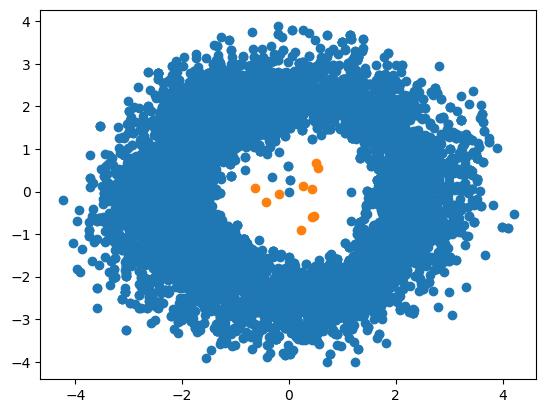

In [17]:
plt.scatter(chain[:,0], chain[:,1])
plt.scatter(repul_loc[:,0], repul_loc[:,1])